In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [20]:
covid_df = pd.read_csv('../data/COVID-19 Time Series Data (1).csv')
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [21]:
covid_df = covid_df.replace(np.nan, '', regex=True)
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,,0,0.0,0
1,2020-01-23,Afghanistan,,0,0.0,0
2,2020-01-24,Afghanistan,,0,0.0,0
3,2020-01-25,Afghanistan,,0,0.0,0
4,2020-01-26,Afghanistan,,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,,247094,0.0,5460
231740,2022-04-13,Zimbabwe,,247160,0.0,5460
231741,2022-04-14,Zimbabwe,,247208,0.0,5462
231742,2022-04-15,Zimbabwe,,247237,0.0,5462


In [22]:
covid_df['Year'] = covid_df['Date'].str[:4]
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year
0,2020-01-22,Afghanistan,,0,0.0,0,2020
1,2020-01-23,Afghanistan,,0,0.0,0,2020
2,2020-01-24,Afghanistan,,0,0.0,0,2020
3,2020-01-25,Afghanistan,,0,0.0,0,2020
4,2020-01-26,Afghanistan,,0,0.0,0,2020
...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,,247094,0.0,5460,2022
231740,2022-04-13,Zimbabwe,,247160,0.0,5460,2022
231741,2022-04-14,Zimbabwe,,247208,0.0,5462,2022
231742,2022-04-15,Zimbabwe,,247237,0.0,5462,2022


In [23]:
covid_df = covid_df[covid_df['Country/Region'].isin(['US', 'Germany', 'United Kingdom', 'Japan', 'Korea, South', 'Australia'])]
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020
...,...,...,...,...,...,...,...
223579,2022-04-12,United Kingdom,,21679280,0.0,170395,2022
223580,2022-04-13,United Kingdom,,21715116,0.0,171046,2022
223581,2022-04-14,United Kingdom,,21747638,0.0,171396,2022
223582,2022-04-15,United Kingdom,,21747638,0.0,171396,2022


In [24]:
covid_df['Month'] = covid_df['Date'].str[6:7]
covid_df

C:\Users\natha\AppData\Local\Temp/ipykernel_24536/405427029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['Month'] = covid_df['Date'].str[6:7]


,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year,Month
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020,1
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020,1
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020,1
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020,1
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020,1
...,...,...,...,...,...,...,...,...
223579,2022-04-12,United Kingdom,,21679280,0.0,170395,2022,4
223580,2022-04-13,United Kingdom,,21715116,0.0,171046,2022,4
223581,2022-04-14,United Kingdom,,21747638,0.0,171396,2022,4
223582,2022-04-15,United Kingdom,,21747638,0.0,171396,2022,4


In [25]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21216 entries, 7344 to 223583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            21216 non-null  object
 1   Country/Region  21216 non-null  object
 2   Province/State  21216 non-null  object
 3   Confirmed       21216 non-null  int64 
 4   Recovered       21216 non-null  object
 5   Deaths          21216 non-null  int64 
 6   Year            21216 non-null  object
 7   Month           21216 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [27]:
#covid_df.to_csv('covid_clean.csv')
#covid_df.to_csv('C:/Users/natha/Documents/NSS/Projects/capstone_3/data/covid_clean.csv')

In [34]:
year_confirmed = covid_df.groupby(['Year', 'Country/Region'], as_index=False,).agg({'Confirmed':'sum'})
year_confirmed

,Year,Country/Region,Confirmed
0,2020,Australia,5091224
1,2020,Germany,114597958
2,2020,Japan,18466972
3,2020,"Korea, South",6015621
4,2020,US,1725800488
5,2020,United Kingdom,173654605
6,2021,Australia,28433623
7,2021,Germany,1375831810
8,2021,Japan,366702687
9,2021,"Korea, South",80313690


In [35]:
year = year_confirmed[year_confirmed['Year'].isin(['2020', '2021', '2022'])]
america = year[year['Country/Region'].isin(['US'])]
germany = year[year['Country/Region'].isin(['Germany'])]
united_kingdom = year[year['Country/Region'].isin(['United Kingdom'])]
japan = year[year['Country/Region'].isin(['Japan'])]
korea = year[year['Country/Region'].isin(['Korea, South'])]
australia = year[year['Country/Region'].isin(['Australia'])]

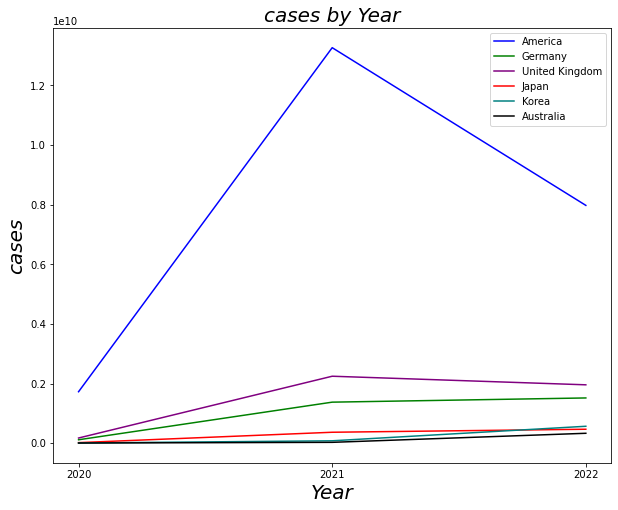

In [37]:
plt.subplots(figsize=(10,8))
plt.plot(america.Year, america.Confirmed, color="Blue")
plt.plot(germany.Year, germany.Confirmed, color="Green")
plt.plot(united_kingdom.Year, united_kingdom.Confirmed, color="Purple")
plt.plot(japan.Year, japan.Confirmed, color="Red")
plt.plot(korea.Year, korea.Confirmed, color="Teal")
plt.plot(australia.Year, australia.Confirmed, color="Black")
plt.title('cases by Year', fontsize=20, fontstyle='oblique')
plt.xlabel('Year', fontsize=20, fontstyle='oblique')
plt.ylabel('cases', fontsize=20, fontstyle='oblique')
plt.legend(["America", "Germany", "United Kingdom", "Japan", "Korea", "Australia"])
plt.show()

In [12]:
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year,Month
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020,1
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020,1
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020,1
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020,1
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020,1
...,...,...,...,...,...,...,...,...
223579,2022-04-12,United Kingdom,,21679280,0.0,170395,2022,4
223580,2022-04-13,United Kingdom,,21715116,0.0,171046,2022,4
223581,2022-04-14,United Kingdom,,21747638,0.0,171396,2022,4
223582,2022-04-15,United Kingdom,,21747638,0.0,171396,2022,4


In [13]:
covid_df['MonthYr'] = covid_df['Date'].str[:7]
covid_df

C:\Users\natha\AppData\Local\Temp/ipykernel_24536/806882737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['MonthYr'] = covid_df['Date'].str[:7]


,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year,Month,MonthYr
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020,1,2020-01
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020,1,2020-01
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020,1,2020-01
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020,1,2020-01
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020,1,2020-01
...,...,...,...,...,...,...,...,...,...
223579,2022-04-12,United Kingdom,,21679280,0.0,170395,2022,4,2022-04
223580,2022-04-13,United Kingdom,,21715116,0.0,171046,2022,4,2022-04
223581,2022-04-14,United Kingdom,,21747638,0.0,171396,2022,4,2022-04
223582,2022-04-15,United Kingdom,,21747638,0.0,171396,2022,4,2022-04


In [14]:
covid_21 = covid_df[['Country/Region', 'Confirmed', 'Deaths', 'MonthYr']]
covid_21

,Country/Region,Confirmed,Deaths,MonthYr
7344,Australia,0,0,2020-01
7345,Australia,0,0,2020-01
7346,Australia,0,0,2020-01
7347,Australia,0,0,2020-01
7348,Australia,0,0,2020-01
...,...,...,...,...
223579,United Kingdom,21679280,170395,2022-04
223580,United Kingdom,21715116,171046,2022-04
223581,United Kingdom,21747638,171396,2022-04
223582,United Kingdom,21747638,171396,2022-04


In [15]:
covid_21 = covid_21.groupby(['MonthYr', 'Country/Region'], as_index=False,).agg({'Confirmed':'sum', 'Deaths':'sum'})
covid_21

,MonthYr,Country/Region,Confirmed,Deaths
0,2020-01,Australia,38,0
1,2020-01,Germany,18,0
2,2020-01,Japan,56,0
3,2020-01,United Kingdom,2,0
4,2020-02,Australia,431,0
...,...,...,...,...
107,2022-03,United Kingdom,622766249,5079904
108,2022-04,Australia,80376215,104940
109,2022-04,Germany,359931517,2103536
110,2022-04,Japan,111376556,457559


In [16]:
month = covid_21[covid_21['MonthYr'].isin(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09','2021-10', '2021-11', '2021-12',])]

In [17]:
month

,MonthYr,Country/Region,Confirmed,Deaths
48,2021-01,Australia,889012,28179
49,2021-01,Germany,61835454,1401322
50,2021-01,Japan,9914215,140778
51,2021-01,United Kingdom,102179530,2759702
52,2021-02,Australia,809190,25452
53,2021-02,Germany,65370665,1811350
54,2021-02,Japan,11643489,195704
55,2021-02,United Kingdom,113211317,3272226
56,2021-03,Australia,903649,28179
57,2021-03,Germany,80734735,2281702


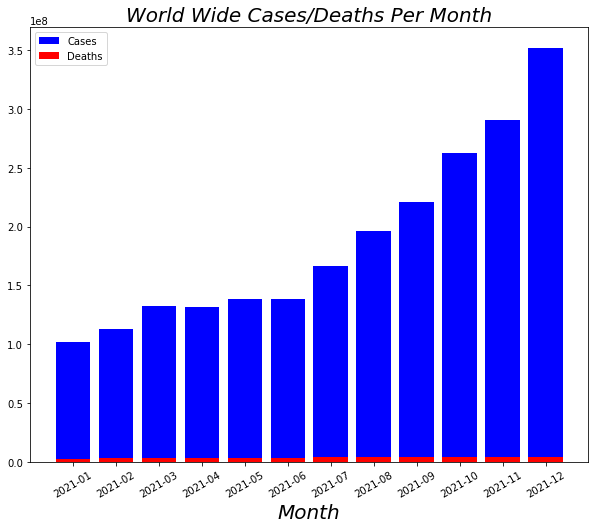

In [18]:
plt.subplots(figsize=(10,8))
plt.bar(month.MonthYr, month.Confirmed, color="Blue")
plt.bar(month.MonthYr, month.Deaths, color="Red")
plt.title('World Wide Cases/Deaths Per Month', fontsize=20, fontstyle='oblique')
plt.xlabel('Month', fontsize=20, fontstyle='oblique')
plt.legend(["Cases", "Deaths"])
plt.xticks(rotation = 30)
plt.show()